In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
dum = pd.read_csv('dummy_data.csv')

In [57]:
dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


In [58]:
dum.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


In [59]:
dum.describe()

,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.029000,15014.823000
std,13.497852,2.537834,2958.628221
min,18.000000,1.000000,10012.000000
25%,29.000000,3.000000,12402.250000
50%,42.000000,5.000000,14904.500000
75%,52.000000,7.000000,17674.250000
max,64.000000,9.000000,19980.000000


<Axes: xlabel='age', ylabel='income'>

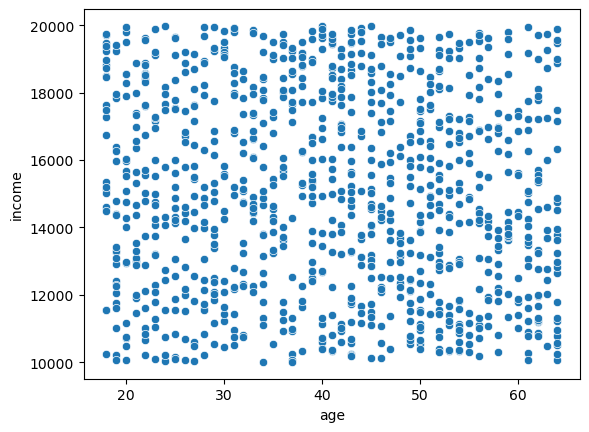

In [60]:
sns.scatterplot(data = dum,x = 'age',y = 'income')

In [38]:
dum['platform'].unique()

array(['Instagram', 'Facebook', 'YouTube'], dtype=object)

In [50]:
dum = dum[ ['time_spent','age'] ].dropna()
dum.head()

,time_spent,age
0,-0.799901,1.112882
1,-1.194135,0.371652
2,1.171269,-0.666069
3,-0.011433,1.409373
4,-1.588369,-1.184929


In [41]:
from sklearn.cluster import KMeans

In [42]:
model = KMeans(n_clusters=4,random_state = 0)
model.fit(dum)

C:\Users\natty\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\natty\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [43]:
model.cluster_centers_

array([[47.44876325,  5.07773852],
       [23.24313725,  5.09411765],
       [35.77272727,  5.11570248],
       [58.97272727,  4.79545455]])

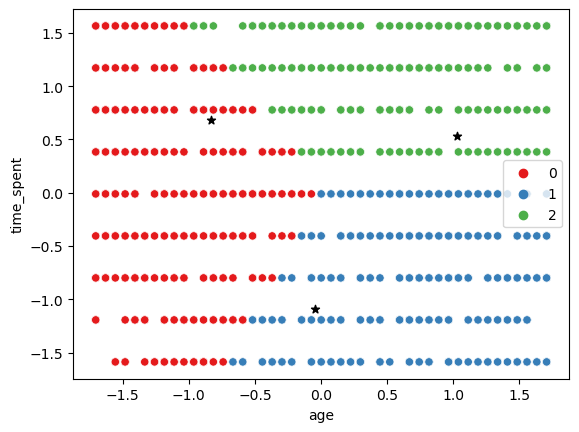

In [53]:
sns.scatterplot(data = dum,x = 'age',y = 'time_spent',hue = model.labels_,palette ='Set1')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color = 'k',marker = '*')

C:\Users\natty\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\natty\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


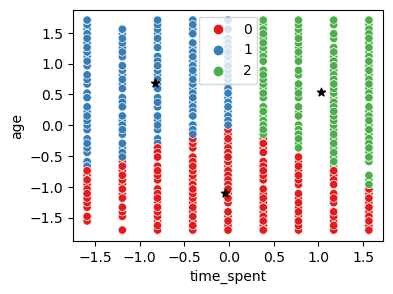

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

dum = pd.read_csv('dummy_data.csv')
dum = dum[ ['time_spent','age'] ].dropna()

scaler.fit(dum)
dum[ ['time_spent','age'] ] = scaler.transform(dum)

from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,random_state = 0)
model.fit(dum)

plt.figure(figsize=[4,3])
sns.scatterplot(data = dum, x = 'time_spent',y = 'age'
               ,hue = model.labels_ , palette = 'Set1')
plt.scatter( model.cluster_centers_[:,0], model.cluster_centers_[:,1]
           ,color = 'k', marker = '*')